In [265]:
import csv
import sklearn
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as pt
import numpy as np
import scipy

In [266]:
#load data
data = np.loadtxt(r'C:\Users\saminens\Desktop\ML\ex2data1.txt', delimiter=",")
x=data[:,0:2]
y=data[:,2:3]


In [269]:
#assign positive and negative values
pos=np.where(y==0)[0]
neg=np.where(y==1)[0]
pt.scatter(x[pos,0],x[pos,1],marker='^')
pt.scatter(x[neg,0],x[neg,1],marker='o')
pt.legend(['Not Admitted','Admitted'],fancybox=True)


In [270]:
def sigmoid(z):
    g=1/(1 + np.exp(-1 * z))
    return g

In [271]:
def costfunction(theta,x,y):
    m=len(y)
    sigmo=sigmoid((x.dot(theta)))
    J=(((-y).T.dot(np.log(sigmo)))-((1-y.T).dot(np.log(1-sigmo))))/m
 #grad returns an array, we need to define it in a function!!   
    grad=((sigmo-y).T.dot(x)).T/m
    return J[0]

In [259]:
def gradient(theta,x,y):
    m=len(y)
    k=sigmoid((x.dot(theta.reshape(-1,1))))
    grad=((k-y).T.dot(x)).T/m
  #we need a column matrix  
    return (np.hstack(grad))
        
    

In [260]:
[m,n]=np.shape(x)
o=np.ones((m,1))
x=np.hstack((o,x))
itheta=np.zeros((x.shape[1]))
cost=costfunction(itheta,x,y)
grad=gradient(itheta,x,y)


In [261]:
optim=scipy.optimize.fmin_bfgs(costfunction,itheta,fprime=gradient,args=(x,y),maxiter=500)
optim

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 23
         Function evaluations: 31
         Gradient evaluations: 31


C:\Users\saminens\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


array([-25.16133284,   0.2062317 ,   0.2014716 ])

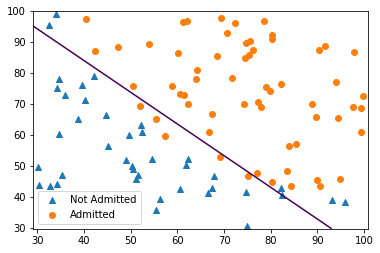

In [262]:
minx1,maxx1=[min(x[:,1]-1),max(x[:,1])+1]
minx2,maxx2=[min(x[:,2]-1),max(x[:,2])+1]
#Create a 2-D mesh to plot points and join the line after getting the 2 co-ordinates
plot_x,plot_y=np.meshgrid(np.linspace(minx1,maxx1),np.linspace(minx2,maxx2))
q=sigmoid(np.c_[np.ones((plot_x.ravel().shape[0],1)),plot_x.ravel(),plot_y.ravel()].dot(optim))
q=q.reshape(plot_x.shape)
pt.contour(plot_x,plot_y,q,[0.5])
pt.show()